Изучение влияния дня недели на объем продаж и прибыль

In [ ]:
import pandas as pd
import numpy as np  # linear algebra
import matplotlib.pyplot as plt

In [16]:
df = (pd.read_csv('D:\\chapters\\.venv\\chapter 9\\supermarket_sales.csv'))
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


зависимость количества продаж от дня недели

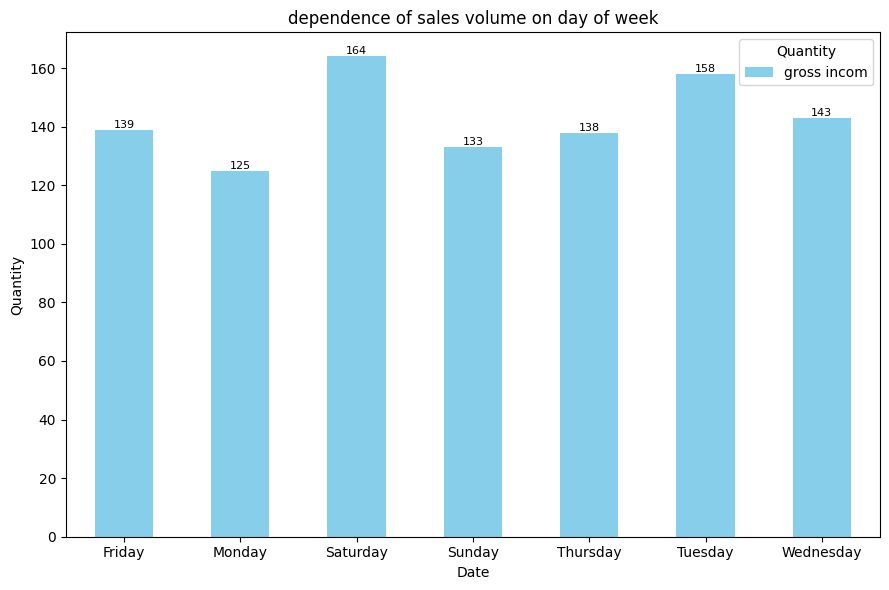

In [12]:
import datetime
g=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_2 = df.copy()
for i in df['Date']:
    i1=str(i).split("/")
    i1=datetime.datetime(int(i1[2]),int(i1[0]),int(i1[1]))
    i1=g[i1.weekday()]
    df_2['Date'] = df_2['Date'].replace(i,i1)
a = pd.crosstab(df_2['Date'],['Quantity'])
ax =a.plot(kind='bar', stacked=False, figsize=(9, 6), color=['skyblue'])
plt.title('dependence of sales volume on day of week')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.legend(title='Quantity')
for container in ax.containers:ax.bar_label(container, label_type='edge', fontsize=8)
plt.tight_layout()
plt.show()

зависимость дохода от дня недели

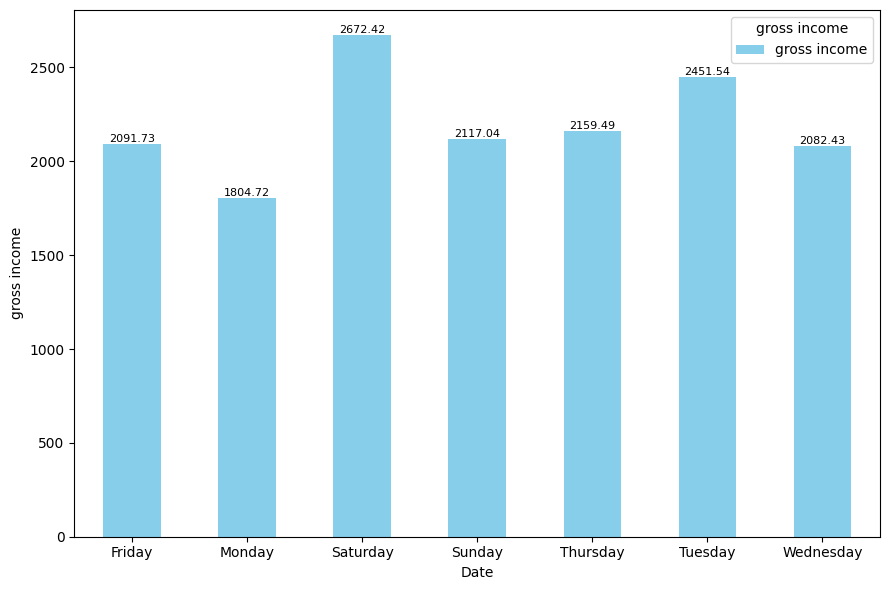

In [15]:
a = df_2.groupby('Date')['gross income'].sum()
ax =a.plot(kind='bar', stacked=False, figsize=(9, 6), color=['skyblue'])
plt.title('')
plt.xlabel('Date')
plt.ylabel('gross income')
plt.xticks(rotation=0)
plt.legend(title='gross income')
for container in ax.containers:ax.bar_label(container, label_type='edge', fontsize=8)
plt.tight_layout()
plt.show()

Посмотреть, как меняется объем покупок и прибыль для каждой категории товаров по дням недели.
Это поможет выявить, какие товары пользуются спросом в определенные дни и может указать на необходимость специальных предложений или увеличения ассортимента в эти дни.

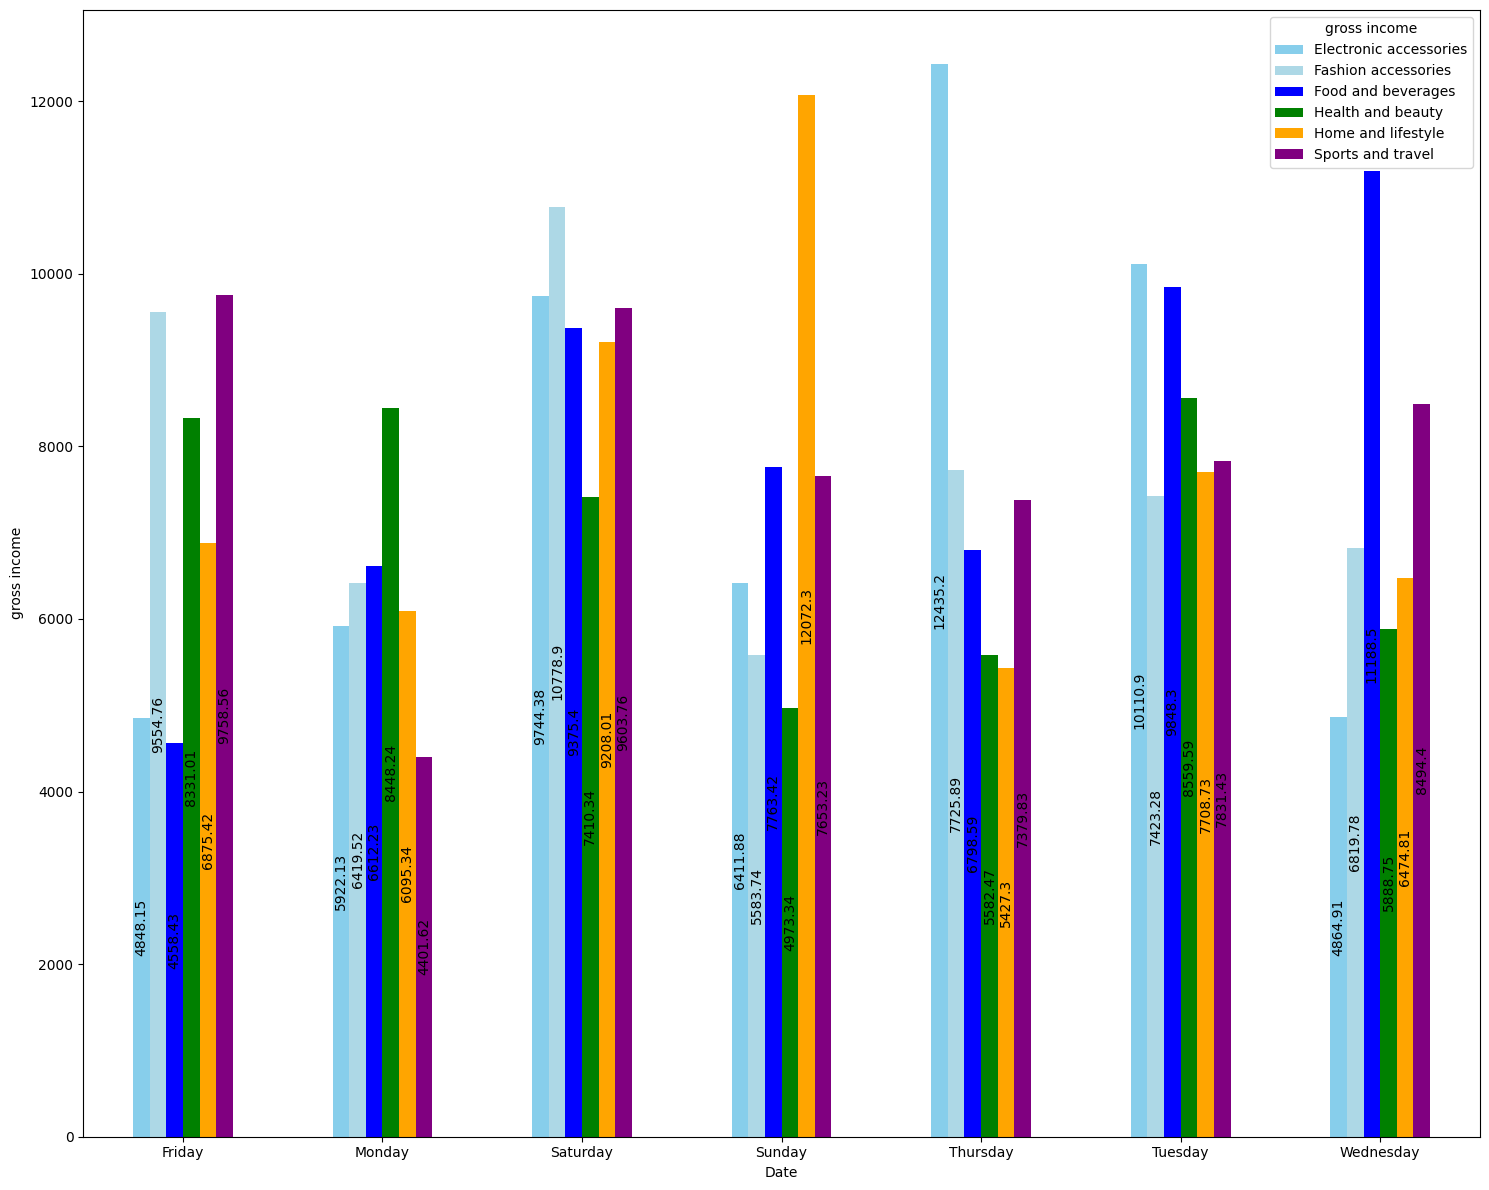

In [17]:
a = df_2.groupby(['Date','Product line'])['Total'].sum().unstack()
ax =a.plot(kind='bar', stacked=False, figsize=(15, 12), color=['skyblue','lightblue','blue', 'green', 'orange', 'purple'])
plt.title('')
plt.xlabel('Date')
plt.ylabel('gross income')
plt.xticks(rotation=0)
plt.legend(title='gross income')
for container in ax.containers:ax.bar_label(container, label_type='center', fontsize=10,rotation=90 )
plt.tight_layout()
plt.show()